# Analyzing a few datasets related to an Online retail Sales company and helping them with insights 

### This case is about an online retail organization based out of Portugal. Like every other organization, their objective is profit maximization. 
### This online retail store contains many orders and these orders are linked to the customers, sellers, products and customer reviews data. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.
### After a customer purchases the product from the website a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where the customer can give a note for the purchase experience and write down some comments.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import quandl, math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing, svm 
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from matplotlib import style
style.use('fivethirtyeight')
style.use('ggplot')

In [2]:
cst = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/customers.csv")
itm = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/order_items.csv")
pmt = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/order_payments.csv")
rev = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/order_reviews.csv")
odr = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/orders.csv")
ctg = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/product_category_name.csv")
prd = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/products.csv")
slr = pd.read_csv("C:/Users/ASUS/Desktop/Capastone/Online Retail/sellers.csv")

# EDA

In [3]:
ddf = pd.merge(prd,itm,on = 'product_id',how = 'left')

ddf = pd.merge(ddf,ctg,on = 'product_category_name',how = 'left')
prd_per = ddf.copy()

df =  ddf.copy()
df.drop(['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','order_id','order_item_id','seller_id','shipping_limit_date'],axis = 1, inplace = True)



In [4]:
df['K'] = df['product_category_name_english'].isnull()
A = df[ df['K'] == True]

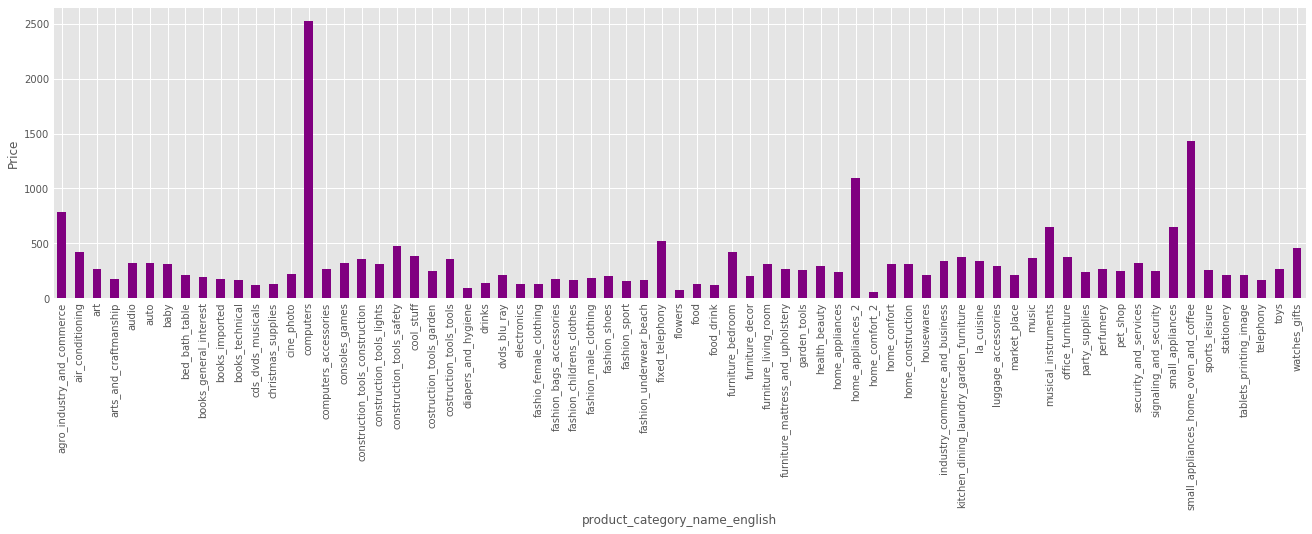

In [5]:
df = df[['product_category_name_english','price']].groupby("product_category_name_english", as_index = False).mean()
barG = df.plot(x = 'product_category_name_english', kind='bar',legend = False, sort_columns = True, figsize = (20,5), color= 'purple')
barG.set_xlabel("product_category_name_english")
barG.set_ylabel("Price")
plt.show()

# Que •	Which are the segments that you would like the online retail company to promote its products and why?

### Ans •	According to me the company should promote its computer segments as it is most expensive category means highest margin product, and more margin means more profit to the company.

less data


In [6]:
df = pd.merge(pmt,odr,on = 'order_id',how = 'left')

df_del = df[df['order_status'] == 'delivered']

df_del['order_approved_at'].fillna(df_del['order_purchase_timestamp'], inplace = True)
df_del['order_delivered_customer_date'].fillna(df_del['order_estimated_delivery_date'], inplace = True)

df_del['order_estimated_delivery_date'] = pd.to_datetime(df_del['order_estimated_delivery_date'])
df_del['order_delivered_customer_date'] = pd.to_datetime(df_del['order_delivered_customer_date'])
df_del['order_purchase_timestamp'] = pd.to_datetime(df_del['order_purchase_timestamp'])
df_del['year'] = pd.to_datetime(df_del['order_purchase_timestamp']).dt.strftime('%Y')
df_del['del_time_diff'] = df_del['order_estimated_delivery_date'] - df_del['order_delivered_customer_date']
df_del['del_time_diff'] = df_del['del_time_diff']/np.timedelta64(1,'D')
df_del['del_time'] = df_del['order_delivered_customer_date'] - df_del['order_purchase_timestamp']
df_del['del_time'] = df_del['del_time']/np.timedelta64(1,'D')

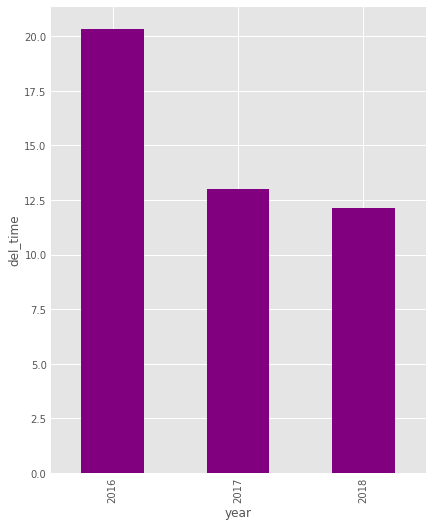

In [7]:
viz = df_del[['del_time','year']].groupby("year", as_index = False).mean()
barG = viz.plot(x = 'year', kind='bar',legend = False, sort_columns = True, figsize = (6,8), color= 'purple')
barG.set_xlabel("year")
barG.set_ylabel("del_time")
plt.show()

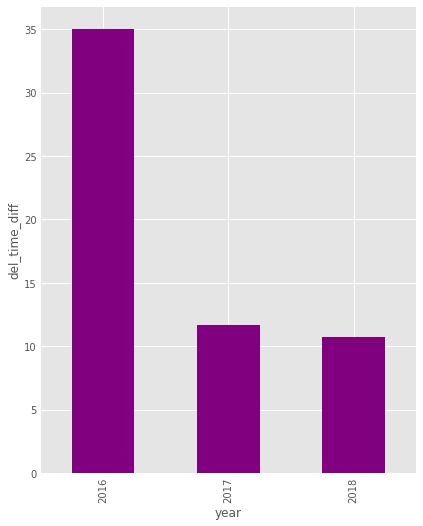

In [8]:
viz = df_del[['del_time_diff','year']].groupby("year", as_index = False).mean()
barG = viz.plot(x = 'year', kind='bar',legend = False, sort_columns = True, figsize = (6,8), color= 'purple')
barG.set_xlabel("year")
barG.set_ylabel("del_time_diff")
plt.show()

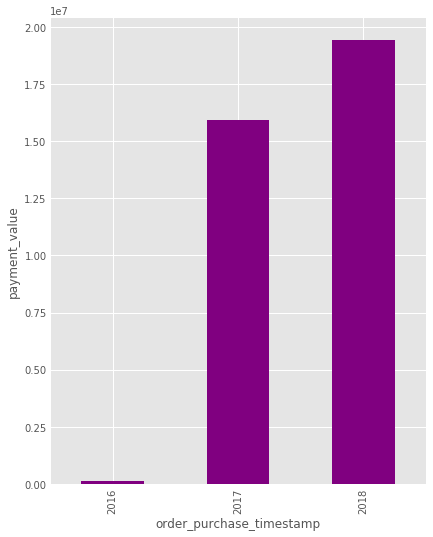

In [9]:
df_del_yr = df_del[['payment_type','payment_value','order_purchase_timestamp']]

df_del_yr['order_purchase_timestamp'] = pd.to_datetime(df_del_yr['order_purchase_timestamp']).dt.strftime('%Y')

viz = df_del_yr[['order_purchase_timestamp','payment_value']].groupby("order_purchase_timestamp", as_index = False).sum()
barG = viz.plot(x = 'order_purchase_timestamp', kind='bar',legend = False, sort_columns = True, figsize = (6,8), color= 'purple')
barG.set_xlabel("order_purchase_timestamp")
barG.set_ylabel("payment_value")
plt.show()

In [10]:
viz

,order_purchase_timestamp,payment_value
0,2016,107148.86
1,2017,15922691.07
2,2018,19441870.18


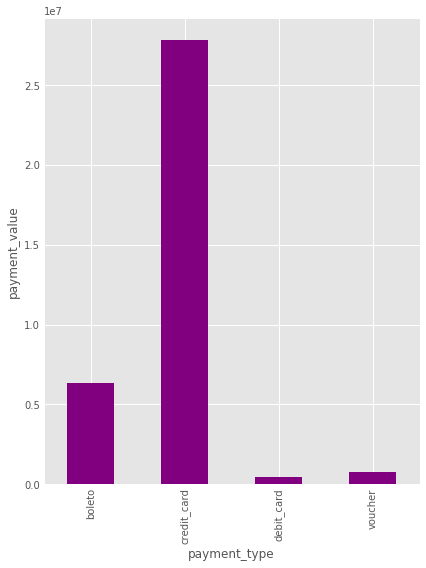

In [11]:
viz = df_del_yr[['payment_type','payment_value']].groupby("payment_type", as_index = False).sum()
barG = viz.plot(x = 'payment_type', kind='bar',legend = False, sort_columns = True, figsize = (6,8), color= 'purple')
barG.set_xlabel("payment_type")
barG.set_ylabel("payment_value")
plt.show()

# Que •	What is the expected Revenue for 2019 ? What are the factors that you prescribe for the online retail company to indicate correction in this place would increase revenue in 2019?

## Ans • The expected Revenue for 2019 is almost 2,33,30,000 (approx 20% profit as in 2018). The factors that company needs correction are its payment option most of the payment are belong to single section ,company need to give some offers to different payment options too, and company need to decrease its delivery time as it was approx 13 days per order in this place to increase revenue in 2019

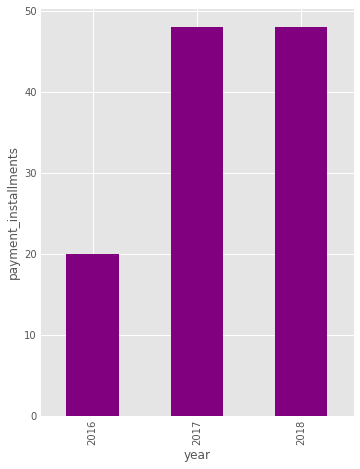

In [12]:
df['year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.strftime('%Y')

viz = df[['payment_installments','year']].groupby("year", as_index = False).max()
barG = viz.plot(x = 'year', kind='bar',legend = False, sort_columns = True, figsize = (5,7), color= 'purple')
barG.set_xlabel("year")
barG.set_ylabel("payment_installments")
plt.show()

# Que •	Sales growth was exponential between 2016 and 2017. In your opinion what could have been the reason for this growth?

## Ans • Sales growth was exponential between 2016 and 2017 because of 
## a) The delivery time reduces in 2017 as compare to 2016
## b) The payment inatallment increase to 48 from 20 as in 2016 . 

In [13]:
prd_per = pd.merge(prd_per,rev,on = 'order_id',how = 'left')

df =  prd_per.copy()
df.drop(['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','order_id','order_item_id','seller_id','shipping_limit_date','price','freight_value','review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'],axis = 1, inplace = True)

viz = df[['product_category_name_english','review_score']].groupby("product_category_name_english", as_index = False).mean()
viz.sort_values(by=['review_score'], inplace= True)
viz.head(10)

,product_category_name_english,review_score
61,security_and_services,2.500000
23,diapers_and_hygiene,3.256410
46,home_comfort_2,3.366667
57,office_furniture,3.484421
30,fashion_male_clothing,3.621212
34,fixed_telephony,3.671698
58,party_supplies,3.767442
27,fashio_female_clothing,3.780000
52,la_cuisine,3.785714
4,audio,3.808219


# Que •	They have decided to launch a targeted campaign to attract its customers. Can you help identify the low hanging fruits for this targeted campaign.

## Ans •	The Low hanging products can be seen in the list as 'security_and_services' , 'diapers_and_hygiene' and many more .

In [14]:
from sklearn.preprocessing import StandardScaler
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier

df = pd.merge(itm,rev,on = 'order_id',how = 'left')
df = pd.merge(df,odr,on = 'order_id',how = 'left')
df = pd.merge(df,pmt,on = 'order_id',how = 'left')
df = df[df['order_status'] == 'delivered']

df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace = True)
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], inplace = True)

df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['del_time_diff'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['del_time_diff'] = df['del_time_diff']/np.timedelta64(1,'D')
df['del_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['del_time'] = df['del_time']/np.timedelta64(1,'D')

df['other_charges'] = df['payment_value'] - df['price']
df['final_payment'] = df['payment_value']

df= df.drop(index = 88643)
df= df.drop(index = 88644)
df= df.drop(index = 88645)

df['class'] = df['review_score'].apply(lambda x : "bad" if x < 2 else ("average" if 2 <= x < 4 else "good"))

df2 = df.copy()
df2.drop(['order_id','order_item_id','product_id','seller_id','freight_value','shipping_limit_date','review_creation_date','review_answer_timestamp','order_purchase_timestamp','review_id','review_comment_title','payment_value','payment_type','review_comment_message','customer_id','order_status','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential'],axis=1, inplace=True)

df7= df2['class'].copy()
df2.drop(['class'],axis = 1, inplace = True)
df3 = pd.merge(df2, df7, left_index = True, right_index = True)


In [15]:
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
sk_lda = LinearDiscriminantAnalysis()
X_lda = sk_lda.fit_transform(df2, df7)

sk_lda.explained_variance_ratio_

array([9.99669663e-01, 3.30337436e-04])

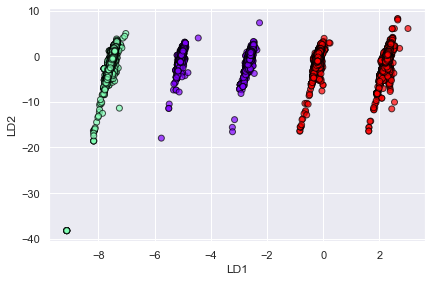

In [16]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],c = y,cmap = 'rainbow',alpha = 0.7,edgecolors ='black')

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df2, df7)

pca.explained_variance_ratio_

array([0.77646965, 0.22322253])

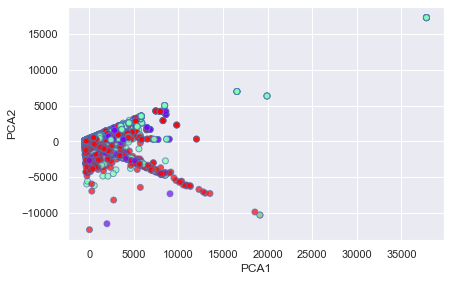

In [18]:
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.scatter(X_pca[:,0],X_pca[:,1],c = y,cmap='rainbow',alpha=0.7,edgecolors='b')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y,random_state = 111)

model1 = RandomForestClassifier()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[ 3506,     0,     0],
       [    0,  3419,     0],
       [    0,     0, 22007]], dtype=int64)

In [20]:
viz = df.groupby('review_score', as_index = False).mean()
viz

,review_score,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,del_time_diff,del_time,other_charges,final_payment
0,1,1.461669,285.345804,27.512975,1.089085,6.556560,546.216036,5.315462,19.562239,260.870232,546.216036
1,2,1.307712,264.061089,27.052439,1.094085,6.294984,429.004789,8.935405,15.907019,164.943701,429.004789
2,3,1.219775,250.570576,26.284318,1.070287,5.980943,385.664983,10.413747,14.036041,135.094407,385.664983
3,4,1.160814,273.866810,26.173802,1.087250,5.615253,376.373893,11.764359,12.245880,102.507083,376.373893
4,5,1.144669,278.930142,25.483904,1.095988,5.792362,369.760697,12.739132,10.678378,90.830554,369.760697


# Que .	Some customers didn't write a review. But why are they happy or dissatisfied? (Discriminant)

## Ans .The customers who didn't write a review. But how they were happy or dissatisfied would seen in the above table as -
### The high rating reviewed product have average less delivery time as compare to low rated products.
### The high rated product have less average payment value difference from actual product price due to less interest as compare to low rated.

In [21]:
df = pd.merge(itm,rev,on = 'order_id',how = 'left')
df = pd.merge(df,odr,on = 'order_id',how = 'left')
df = pd.merge(df,pmt,on = 'order_id',how = 'left')
df = df[df['order_status'] == 'delivered']

df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace = True)
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], inplace = True)

df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['del_time_diff'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['del_time_diff'] = df['del_time_diff']/np.timedelta64(1,'D')
df['del_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['del_time'] = df['del_time']/np.timedelta64(1,'D')

df['other_charges'] = df['payment_value'] - df['price']
df['final_payment'] = df['payment_value']

df= df.drop(index = 88643)
df= df.drop(index = 88644)
df= df.drop(index = 88645)

df2 = df.copy()
df2.drop(['order_id','order_item_id','product_id','seller_id','freight_value','shipping_limit_date','review_creation_date','review_answer_timestamp','review_id','review_comment_title','payment_value','payment_type','review_comment_message','customer_id','order_status','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential'],axis=1, inplace=True)

df2 = df2.set_index('order_purchase_timestamp')

forecast_col = 'final_payment'
df2.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.003 * len(df2)))
df2['label'] = df2['final_payment'].shift(-forecast_out)

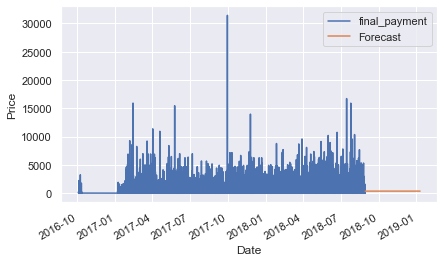

In [22]:
X = np.array(df2.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out:]
df2.dropna(inplace=True)

y = np.array(df2['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)

clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

forecast_set = clf.predict(X_lately)
df2['Forecast'] = np.nan

last_date = df2.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df2.loc[next_date] = [np.nan for _ in range(len(df2.columns)-1)]+[i]


df2['final_payment'].plot()
df2['Forecast'].plot()
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Que . Prediction: With purchase date information predict the future sales information. 

## Ans . After applying regression we can see the future sales performance of the company through the graph. 

In [50]:
dfO = pd.merge(odr,cst,on = 'customer_id',how = 'left')
dfI = pd.merge(itm,slr,on = 'seller_id',how = 'left')
dfA = pd.merge(dfI,dfO,on = 'order_id',how = 'left')
df = dfA[dfA['order_status'] == 'delivered']

df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace = True)
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], inplace = True)
df['order_delivered_carrier_date'].fillna(df['shipping_limit_date'], inplace = True)

df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['del_time_diff'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['del_time_diff'] = df['del_time_diff']/np.timedelta64(1,'D')
df['del_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['del_time'] = df['del_time']/np.timedelta64(1,'D')

df2 = df.copy()
df2.drop(['order_item_id','customer_unique_id','price','freight_value','order_status'],axis=1, inplace=True)

viz = df2.groupby(['product_id','seller_id'], as_index = False).mean()

viz_min = viz.groupby('product_id', as_index = False).min()

viz_min.drop(['customer_zip_code_prefix','seller_zip_code_prefix','del_time_diff'],axis=1, inplace=True)
viz_min

,product_id,seller_id,del_time
0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,17.143461
1,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,10.910683
2,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,15.945764
3,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,6.578958
4,000d9be29b5207b54e86aa1b1ac54872,8ae520247981aa06bc94abddf5f46d34,7.121968
...,...,...,...
32211,fff6177642830a9a94a0f2cba5e476d1,7a67c85e85bb2ce8582c35f2203ad736,9.138912
32212,fff81cc3158d2725c0655ab9ba0f712c,778323240ce2830d68aab11794e00bfb,2.179016
32213,fff9553ac224cec9d15d49f5a263411f,643214e62b870443ccbe55ab29a4dccf,10.196921
32214,fffdb2d0ec8d6a61f0a0a0db3f25b441,9f505651f4a6abe901a56cdc21508025,6.801213


In [51]:
df_name = pd.merge(prd,ctg,on = 'product_category_name',how = 'left')
df_name.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','product_category_name'],axis=1, inplace=True)

df_name = viz_min.merge(df_name, on='product_id', how='left')

df_name =  df_name.fillna('company product')
dl = df_name.copy()

dfA = dfA.dropna()

dfA.drop(['order_id','order_item_id','seller_id','shipping_limit_date','price','freight_value','customer_zip_code_prefix','customer_state','seller_zip_code_prefix','seller_city','seller_state','customer_id','order_status','order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','customer_unique_id'],axis=1, inplace=True)

dl = dl.merge(dfA ,on='product_id', how = 'left')
s_id = dl['seller_id'].copy()
dl.drop(['seller_id','product_id','product_category_name_english'],axis = 1, inplace = True)
dl = pd.merge(dl, s_id, left_index = True, right_index = True)
dl = dl.dropna()
dl = dl.groupby('customer_city', as_index= False ).min()

# here is the csv in which after applying vlookup you got your desier result
#dl.to_csv ('delivery.csv', index = False, header=True)

# Que.	Performance: Identify delivery performance and find ways to optimize delivery times.

## Ans. Here is the delivery.csv file through which we can say which seller have optimize delivery in that specific area. 

In [28]:
df = pd.merge(itm,rev,on = 'order_id',how = 'left')
df = pd.merge(df,odr,on = 'order_id',how = 'left')
df = pd.merge(df,pmt,on = 'order_id',how = 'left')
df = df[df['order_status'] == 'delivered']

df['order_approved_at'].fillna(df['order_purchase_timestamp'], inplace = True)
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], inplace = True)

df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['del_time_diff'] = df['order_estimated_delivery_date'] - df['order_delivered_customer_date']
df['del_time_diff'] = df['del_time_diff']/np.timedelta64(1,'D')
df['del_time'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['del_time'] = df['del_time']/np.timedelta64(1,'D')

df['other_charges'] = df['payment_value'] - df['price']
df['final_payment'] = df['payment_value']

df= df.drop(index = 88643)
df= df.drop(index = 88644)
df= df.drop(index = 88645)

df_name = pd.merge(prd,ctg,on = 'product_category_name',how = 'left')
df_name = df_name.dropna()
df_name = df_name.merge(df, on = 'product_id',how = 'left')

cdf = df_name[['product_category_name_english','price','freight_value','review_score','order_status','payment_sequential','payment_installments','payment_value','del_time','other_charges','final_payment']].copy()

viz = cdf.groupby('product_category_name_english', as_index = False).mean()
viz.sort_values(by=['review_score'], inplace= True)
viz.head()

,product_category_name_english,price,freight_value,review_score,payment_sequential,payment_installments,payment_value,del_time,other_charges,final_payment
61,security_and_services,325.783500,26.793000,2.500000,1.000000,2.000000,373.190000,15.138154,47.406500,373.190000
23,diapers_and_hygiene,93.292351,19.162703,3.378378,1.000000,5.675676,256.493784,10.775192,163.201432,256.493784
46,home_comfort_2,57.364226,17.666161,3.387097,1.032258,2.903226,126.911613,14.312861,69.547387,126.911613
57,office_furniture,365.974434,51.693140,3.542825,1.235961,7.711855,836.656177,20.959866,470.681742,836.656177
30,fashion_male_clothing,188.102000,21.222123,3.630435,1.123188,5.173913,278.724420,13.207452,90.622420,278.724420


In [29]:
cdf.drop(['product_category_name_english'], axis = 1, inplace = True)
cdf['customer_satisfaction'] = cdf['review_score'].apply(lambda x : "no" if x < 4  else "yes")
cdf = cdf.dropna()

In [30]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

final_features = pd.get_dummies(cdf,drop_first = True)
final_features.shape

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

num_vars = ['price','freight_value','review_score','payment_sequential','payment_value','del_time','other_charges','final_payment']
final_features[num_vars] = sc.fit_transform(final_features[num_vars])

y = final_features['customer_satisfaction_yes'].reset_index(drop=True)
final_features.drop(['customer_satisfaction_yes'], axis = 1, inplace = True)

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(y):, :]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .3, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((79846, 9), (79846,), (34220, 9), (34220,))

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
result = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=51)
    croresults = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    result.append(croresults)
    output = "%s: %f (%f)" % (name, croresults.mean(), croresults.std())
    print(output)

LR: 1.000000 (0.000000)
KNN: 0.999787 (0.000169)
DTC: 1.000000 (0.000000)
NB: 0.977807 (0.001931)
GBC: 1.000000 (0.000000)
RFC: 1.000000 (0.000000)


In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [54]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

# Que.	Product Quality: Discover the product categories that are more prone to customer dissatisfaction.

## Ans. Through above analysis we can say that the categories which are prone to customer dissatisfaction are 'security_and_services', 'diapers_and_hygiene', 'home_comfort_2', 'office_furniture' and 'fashion_male_clothing' .	

In [33]:
df2 = df.copy()
df2.drop(['order_id','order_item_id','seller_id','shipping_limit_date','review_creation_date','review_answer_timestamp','order_purchase_timestamp','review_id','review_comment_title','payment_type','review_comment_message','customer_id','order_status','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','payment_sequential','del_time','del_time_diff','payment_installments'],axis=1, inplace=True)

df2 = df2.merge(prd[['product_id','product_category_name']], on = 'product_id',how = 'left')

viz = df2.groupby('product_category_name', as_index = False).sum()
viz.sort_values(by=['final_payment'], inplace= True)

viz.reset_index()
viz.head(19)

,product_category_name,price,freight_value,review_score,payment_value,other_charges,final_payment
67,seguros_e_servicos,651.567,53.586,5,746.38,94.813,746.38
37,fashion_roupa_infanto_juvenil,1195.885,102.336,35,1653.66,457.775,1653.66
17,cds_dvds_musicais,1679.000,292.487,65,2758.68,1079.680,2758.68
15,casa_conforto_2,1778.291,547.651,105,3934.26,2155.969,3934.26
60,pc_gamer,3304.962,179.699,30,4427.52,1122.558,4427.52
41,flores,2553.092,635.531,139,5089.93,2536.838,5089.93
4,artes_e_artesanato,4172.223,481.169,99,5350.21,1177.987,5350.21
46,la_cuisine,5299.154,502.957,63,6701.14,1401.986,6701.14
35,fashion_esporte,4874.873,750.269,131,8383.35,3508.477,8383.35
42,fraldas_higiene,3451.817,709.020,125,9490.27,6038.453,9490.27


# Que.	There are 74 product categories. However, the ecommerce platform wants to optimize their number of product categories and want to reduce by 75%. How will they do that and which all will be the categories that they should concentrate? 

## Ans. so according to the table the these are the product categories which are need to remove to optimize the no. of product categories.